In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('temps.csv')

In [3]:
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
df.shape

(348, 12)

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,348.0,2016.000000,0.000000,2016.0,2016.000,2016.0,2016.000,2016.0
month,348.0,6.477011,3.498380,1.0,3.000,6.0,10.000,12.0
day,348.0,15.514368,8.772982,1.0,8.000,15.0,23.000,31.0
temp_2,348.0,62.652299,12.165398,35.0,54.000,62.5,71.000,117.0
temp_1,348.0,62.701149,12.120542,35.0,54.000,62.5,71.000,117.0
average,348.0,59.760632,10.527306,45.1,49.975,58.2,69.025,77.4
actual,348.0,62.543103,11.794146,35.0,54.000,62.5,71.000,92.0
forecast_noaa,348.0,57.238506,10.605746,41.0,48.000,56.0,66.000,77.0
forecast_acc,348.0,62.373563,10.549381,46.0,53.000,61.0,72.000,82.0
forecast_under,348.0,59.772989,10.705256,44.0,50.000,58.0,69.000,79.0


In [6]:
import datetime
#getting years, months and years
years= df.year
months= df.month
days= df.day

#list and convert to datetime object
dates= [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates= [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# output dates in Year,monnth,day,hour,minute format

C:\Users\Oyelaja Iremide\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


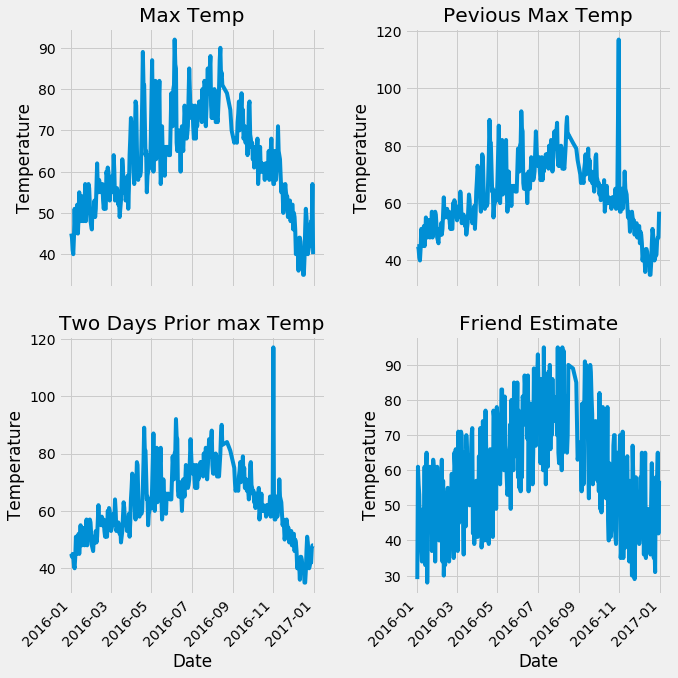

In [7]:
plt.style.use('fivethirtyeight')

#visualiizing the data
#set up the plotting layout
fig, ((ax1, ax2), (ax3,ax4))= plt.subplots(nrows=2, ncols=2, figsize=(10,10))
fig.autofmt_xdate(rotation=45)

#plotting actual,temp_1, temp_2 and friend against dates
ax1.plot(dates, df['actual'])
ax1.set_xlabel('')
ax1.set_ylabel('Temperature')
ax1.set_title('Max Temp')

ax2.plot(dates, df['temp_1'])
ax2.set_xlabel('')
ax2.set_ylabel('Temperature')
ax2.set_title('Pevious Max Temp')

print('\n')

ax3.plot(dates, df['temp_2'])
ax3.set_xlabel('Date')
ax3.set_ylabel('Temperature')
ax3.set_title('Two Days Prior max Temp')

ax4.plot(dates, df['friend'])
ax4.set_xlabel('Date')
ax4.set_ylabel('Temperature')
ax4.set_title('Friend Estimate')

plt.tight_layout(pad=2)

In [8]:
#convert categorical columns by using get_dummies function
data= pd.get_dummies(df)

In [9]:
data.dtypes

year                int64
month               int64
day                 int64
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
week_Fri            uint8
week_Mon            uint8
week_Sat            uint8
week_Sun            uint8
week_Thurs          uint8
week_Tues           uint8
week_Wed            uint8
dtype: object

In [10]:
#the actual column is coverted to array and assign to labels
labels= np.array(data['actual'])

In [11]:
#all columns apart from actual assign to features
features= data.drop('actual', axis=1)


In [12]:
#get the dataset column names and convert to list 
#also convert features to array
features_list= list(data.columns)
features= np.array(features)

In [13]:
#check the length of the data in column month greater than 9
len(data[data['month']>9])

91

In [14]:
#split train and test(valid) set
train_all= data.copy() #copy the dataset to a new variable train_all
train= train_all.loc[train_all.month <= 9] #assign all months less&equal to 9 to train
valid= train_all.loc[train_all.month > 9]  #assign all months greater than 9 to valid
print(train.shape, valid.shape)         #check shape

(257, 18) (91, 18)


In [15]:
target_col= features_list.pop(6)
#pop removes 'index 6' from feature_list and assign to target_col
in_cols= features_list
#assign feature_list to in_cols wch is for X

['year',
 'month',
 'day',
 'temp_2',
 'temp_1',
 'average',
 'forecast_noaa',
 'forecast_acc',
 'forecast_under',
 'friend',
 'week_Fri',
 'week_Mon',
 'week_Sat',
 'week_Sun',
 'week_Thurs',
 'week_Tues',
 'week_Wed']

In [34]:
#Get our X an y training and validation sets ready
X_train, y_train= train[in_cols], train[target_col]
X_valid, y_valid= valid[in_cols], valid[target_col]

In [17]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:' ,y_train.shape)
print('Testing Features Shape:' ,X_valid.shape)
print('Testing Labels Shape:' ,y_valid.shape)

Training Features Shape: (257, 17)
Training Labels Shape: (257,)
Testing Features Shape: (91, 17)
Testing Labels Shape: (91,)


In [18]:
#Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

#Split data itself into training and testing sets
train_features, test_features, train_labels, test_labels= train_test_split(features,
                                                                          labels,
                                                                          test_size=0.25,
                                                                          random_state=42)

In [19]:
#The baseline predictions are the historical averages
baseline_preds= test_features[:, features_list.index('average')]

#Baseline errors, and display average baseline error
baseline_errors= abs(baseline_preds- test_labels)
print('Average baseline error:', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error: 5.06 degrees.


In [20]:
from sklearn.svm import SVC

model= SVC()

model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
predictions= model.predict(X_valid)

In [22]:
errors= abs(predictions-y_valid)

In [23]:
print('Mean Absolute Error:' ,round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 14.15 degrees.


In [24]:
mape= 100*(errors/y_valid)

accuracy= 100 - np.mean(mape)

print('Accuracy:',round(accuracy, 2), '%.')

Accuracy: 69.69 %.


In [25]:
param_grid={'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001], 'kernel':['rbf']}

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid= GridSearchCV(SVC(), param_grid, refit= True, verbose=3)

In [28]:
#May take awhile
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.058, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.058, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


C:\Users\Oyelaja Iremide\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.039, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.059, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.058, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.058, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.059, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.039, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.098, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.039, total=   0.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.098, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.038, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.058, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.098, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.078, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.059, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.078, total=   0.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.118, total=   0.1s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    7.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [29]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [30]:
grid.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
grid_predictions= grid.predict(X_valid)

In [32]:
errors= abs(grid_predictions - y_valid)
print('Mean Absolute Error:' ,round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 4.99 degrees.


In [33]:
mape= 100*(errors/y_valid)

accuracy= 100 - np.mean(mape)

print('Accuracy:',round(accuracy, 2), '%.')

Accuracy: 90.02 %.
